In [115]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from os import listdir
from uncertainties import ufloat, unumpy

___
### Resonance frequency of the tip

In [20]:
res_data = np.loadtxt('data/Resonance.cur', delimiter=' ', skiprows=41, usecols=(0,1,2,3))

In [31]:
def lorentzian(x, x0, γ):
    return γ**2 / ((x-x0)**2 + γ**2)

In [39]:
popt, pcov = curve_fit(lorentzian, res_data[:,0] ,res_data[:,1], p0=(51e3,0.5e3))

In [41]:
x_eval = np.linspace(res_data[:,0].min(), res_data[:,0].max(), 1000)

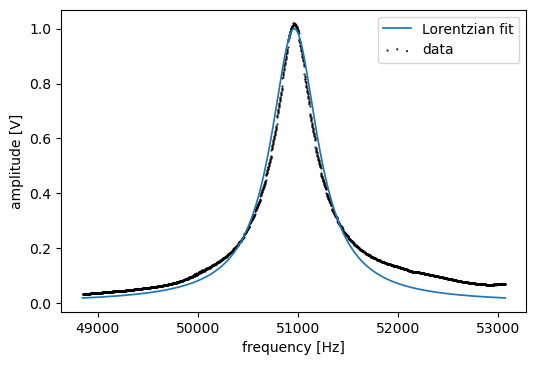

In [59]:
fig, ax = plt.subplots(dpi=100)

ax.scatter(res_data[:,0],res_data[:,1], s=0.25, c='k', label='data')
ax.plot(x_eval, lorentzian(x_eval, *popt), lw=1.25, label='Lorentzian fit')

ax.legend(scatterpoints=3)
ax.set(xlabel='frequency [Hz]', ylabel='amplitude [V]')

fig.savefig('figures/resonance_freq.pdf', dpi=100)

In [58]:
popt 

array([50963.02749211,   285.5138706 ])

In [56]:
np.sqrt(np.diag(pcov))

array([1.08994943, 1.09431069])

___
### Contact potential

In [153]:
path = 'data/hopg_iv_curves/'
fnames = [list(filter(lambda x: 'Avg' in x, listdir(path + 'curve %s'%i)))[0] for i in range(1,11)]

In [154]:
data = [np.loadtxt(path+'curve %s/'%(i+1)+fname, delimiter=' ', skiprows=160, usecols=(0,1,2,3)) for i, fname in enumerate(fnames)]

In [155]:
f_disp = np.zeros(len(data))
f_ster = np.zeros(len(data))
b_disp = np.zeros(len(data))
b_ster = np.zeros(len(data))

for i, d in enumerate(data):
    popt, pcov = np.polyfit(d[:,0], d[:,1], 2, cov=True)
    ste = np.sqrt(np.diag(pcov))
    ucoefs = unumpy.uarray(popt, ste)
    
    disp = - ucoefs[1]/(2*ucoefs[0])
    f_disp[i] = disp.nominal_value
    f_ster[i] = disp.std_dev
    
    popt, pcov = np.polyfit(d[:,2], d[:,3], 2, cov=True)
    ste = np.sqrt(np.diag(pcov))
    ucoefs = unumpy.uarray(popt, ste)
    
    disp = - ucoefs[1]/(2*ucoefs[0])
    b_disp[i] = disp.nominal_value
    b_ster[i] = disp.std_dev

In [156]:
unumpy.uarray(f_disp, f_ster).mean()

-0.36589551407243254+/-0.004071353615607251

In [157]:
unumpy.uarray(b_disp, b_ster).mean()

-0.13089542096392232+/-0.0031159867481507404

In [158]:
path = 'data/gold_iv_curves/'
fnames = [list(filter(lambda x: 'Avg' in x, listdir(path + 'curve %s'%i)))[0] for i in range(1,11)]

In [159]:
data = [np.loadtxt(path+'curve %s/'%(i+1)+fname, delimiter=' ', skiprows=160, usecols=(0,1,2,3)) for i, fname in enumerate(fnames)]

In [160]:
f_disp = np.zeros(len(data))
f_ster = np.zeros(len(data))
b_disp = np.zeros(len(data))
b_ster = np.zeros(len(data))

for i, d in enumerate(data):
    popt, pcov = np.polyfit(d[:,0], d[:,1], 2, cov=True)
    ste = np.sqrt(np.diag(pcov))
    ucoefs = unumpy.uarray(popt, ste)
    
    disp = - ucoefs[1]/(2*ucoefs[0])
    f_disp[i] = disp.nominal_value
    f_ster[i] = disp.std_dev
    
    popt, pcov = np.polyfit(d[:,2], d[:,3], 2, cov=True)
    ste = np.sqrt(np.diag(pcov))
    ucoefs = unumpy.uarray(popt, ste)
    
    disp = - ucoefs[1]/(2*ucoefs[0])
    b_disp[i] = disp.nominal_value
    b_ster[i] = disp.std_dev

In [161]:
unumpy.uarray(f_disp, f_ster).mean()

-0.19159087545738862+/-0.005232433496863806

In [162]:
unumpy.uarray(b_disp, b_ster).mean()

0.038178611505302176+/-0.0047636125439401945